# Monte Carlo

## Izračunavanje vrednosti $\pi$

In [11]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [12]:
square_size = 1
points_inside_circle = 0
points_inside_square = 0
sample_size = 10000
arc = np.linspace(0, np.pi/2, 100)

In [13]:
def generate_points(size):
    x = random.random()*size
    y = random.random()*size
    return(x, y)

In [14]:
def is_in_circle(point, size):
    return math.sqrt(point[0]**2 + point[1]**2) <= size

In [15]:
def compute_pi(points_inside_circle, points_inside_square):
    return 4*(points_inside_circle/points_inside_square)

Priblizna vrednost pi iznosi: 3.142


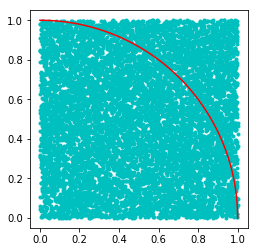

In [16]:
plt.axes().set_aspect('equal')

for i in range(sample_size):
    point = generate_points(square_size)
    plt.plot(point[0], point[1], 'c.')
    points_inside_square += 1
    if is_in_circle(point, square_size):
        points_inside_circle += 1
        
plt.plot(1*np.cos(arc), 1*np.sin(arc), color='red')
print('Priblizna vrednost pi iznosi: {}'.format(compute_pi(points_inside_circle, points_inside_square)))

## Blackjack game

In [1]:
import gym
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from functools import partial
get_ipython().run_line_magic('matplotlib', 'inline')
plt.style.use('ggplot')
env = gym.make('Blackjack-v0')

In [3]:
def sample_policy(observation):
    score, dealer_score, usable_ace = observation
    return score<20

In [4]:
def generate_episode(policy, env):
    states, actions, rewards = [], [], []
    observation = env.reset()
    while True:
        states.append(observation)
        action = sample_policy(observation)
        actions.append(action)
        observation, reward, done, info = env.step(action)
        rewards.append(reward)
        if done:
            break
    return states, actions, rewards

In [5]:
def first_visit_mc_prediction(policy, env, n_episodes):
    value_table = defaultdict(float)
    N = defaultdict(int)

    for _ in range(n_episodes):
        states, _, rewards = generate_episode(policy, env)
        returns = 0
        for t in range(len(states) - 1, -1, -1):
            R = rewards[t]
            S = states[t]
            returns += R
            if S not in states[:t]:
                N[S] += 1
                value_table[S] += (returns - value_table[S]) / N[S]
    return value_table

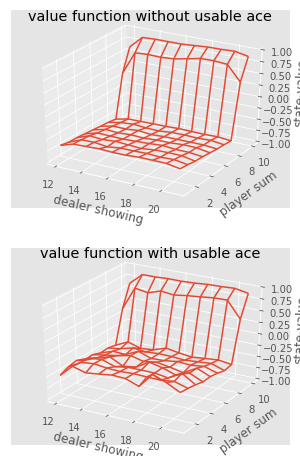

In [6]:
def plot_blackjack(V, ax1, ax2):
    player_sum = np.arange(12, 21 + 1)
    dealer_show = np.arange(1, 10 + 1)
    usable_ace = np.array([False, True])

    state_values = np.zeros((len(player_sum),
                                len(dealer_show),
                                len(usable_ace)))

    for i, player in enumerate(player_sum):
        for j, dealer in enumerate(dealer_show):
            for k, ace in enumerate(usable_ace):
                state_values[i, j, k] = V[player, dealer, ace]

    X, Y = np.meshgrid(player_sum, dealer_show)

    ax1.plot_wireframe(X, Y, state_values[:, :, 0])
    ax2.plot_wireframe(X, Y, state_values[:, :, 1])
    for ax in ax1, ax2:
        ax.set_zlim(-1, 1)
        ax.set_ylabel('player sum')
        ax.set_xlabel('dealer showing')
        ax.set_zlabel('state-value')

value = first_visit_mc_prediction(sample_policy, env, n_episodes=500000)
fig, axes = pyplot.subplots(nrows=2, figsize=(5, 8), subplot_kw={'projection': '3d'})
axes[0].set_title('value function without usable ace')
axes[1].set_title('value function with usable ace')
plot_blackjack(value, axes[0], axes[1])